In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import contextily as ctx

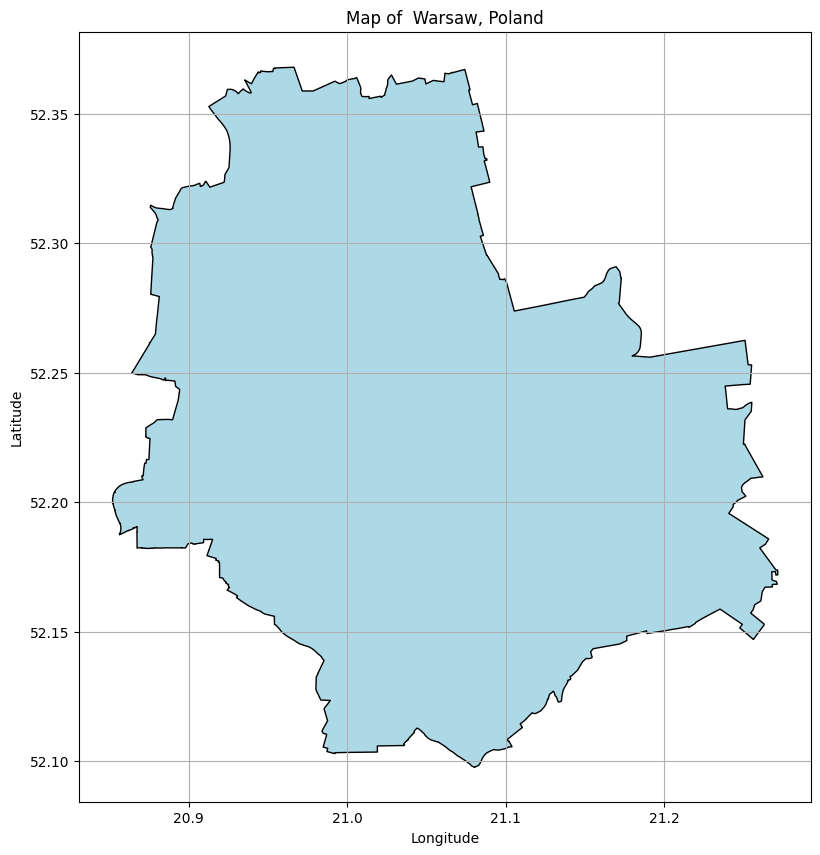

In [15]:
# Specify your neighborhood or area of interest
place_name = " Warsaw, Poland"

# Fetch the boundary data using OSMNX
boundary = ox.geocoder.geocode_to_gdf(place_name)

# Plot the boundary
fig, ax = plt.subplots(figsize=(10, 10))
boundary.plot(ax=ax, color='lightblue', edgecolor='black')

# Add title and labels
plt.title(f"Map of {place_name}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

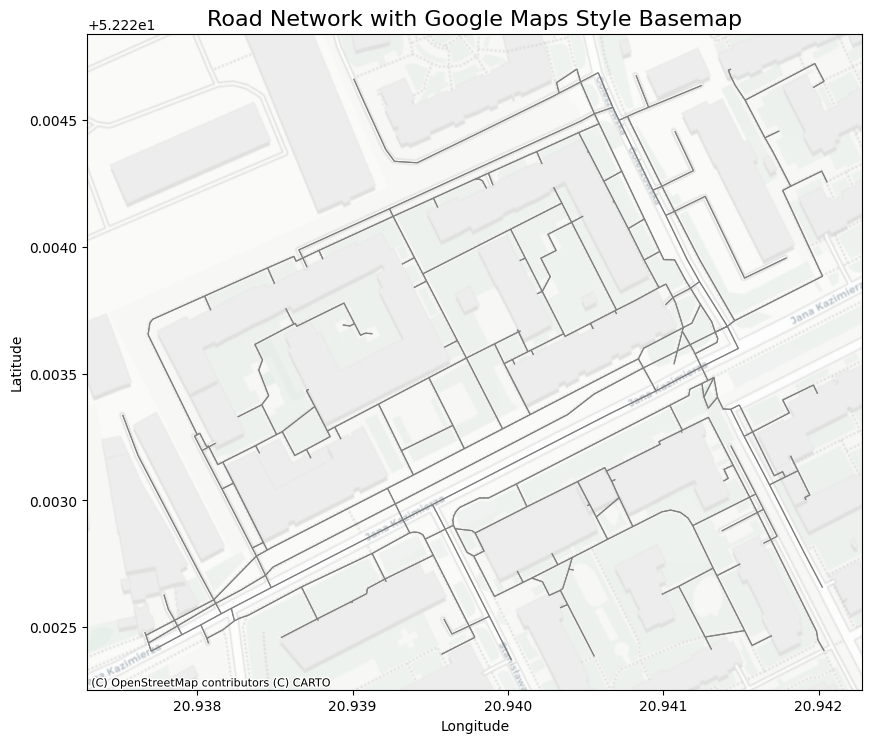

In [16]:
import pickle

# Define the bounding box (latitude and longitude bounds)
north = 52.22471  # Northern latitude
south = 52.22237  # Southern latitude
west = 20.93690   # Eastern longitude
east = 20.94206  # Western longitude

# north = 52.224413  # Northern latitude
# south = 52.222377   # Southern latitude
# west = 20.941188   # Eastern longitude
# east = 20.943607  # Western longitude

edges = [north, south, east, west]
edges = [west, south, east, north]

# Fetch the road network within the bounding box
graph = ox.graph_from_bbox(edges, network_type="all")


# Convert the graph to a GeoDataFrame
edges = ox.graph_to_gdfs(graph, nodes=False)

with open("../data/jk_map_1.pickle", "wb") as f:
    pickle.dump(edges, f, protocol=pickle.HIGHEST_PROTOCOL)

# Plot the roads with a basemap
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.8, edgecolor="gray")  # Plot the roads
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=edges.crs)  # Add basemap
ax.set_title("Road Network with Google Maps Style Basemap", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
